<span style="font-size:20px; font-weight:bold">DATA SCIENCE AND BUSINESS ANALYTICS - THE SPARKS FOUNDATION</span>

<span style="font-size:20px; font-weight:bold">AUTHOR: ARVIN ELEGIDO</span>

<span style="font-size:20px; font-weight:bold">EXPLORATORY DATA ANALYSIS - GLOBAL TERRORISM</span>

<span style="font-size:20px; font-weight:bold">TASK<span>
    
● As a security/defense analyst, try to find out the hot zone of terrorism.
    
● What all security issues and insights you can derive by EDA?

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [185]:
df = pd.read_csv("data/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1', low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

<span style="font-size:15px; font-weight:bold">DATA PREPARATION AND CLEANING</span>

In [177]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


<span style="font-size:15px; font-weight:bold">For our analysis of finding the hot zones of terrorism and deriving security insights, 
we can focus on the following columns from the Global Terrorism dataset. :</span>

<span style="text-decoration: underline; color: red;">eventid</span>: unique identifier assigned to each terrorist incident 

<span style="text-decoration: underline; color: red;">iyear</span>: year of the terrorist incident

<span style="text-decoration: underline; color: red;">imonth</span>: month of the terrorist incident

<span style="text-decoration: underline; color: red;">iday</span>: day of the terrorist incident

<span style="text-decoration: underline; color: red;">country_txt</span>: country name where the incident occurred

<span style="text-decoration: underline; color: red;">region_txt</span>: region where the incident occurred

<span style="text-decoration: underline; color: red;">city</span>: city where the incident occurred

<span style="text-decoration: underline; color: red;">attacktype1_txt</span>: primary attack type

<span style="text-decoration: underline; color: red;">targtype1_txt</span>: primary target type

<span style="text-decoration: underline; color: red;">weaptype1_txt</span>: type of weapon used in the attack

<span style="text-decoration: underline; color: red;">gname</span>: name of the terrorist group responsible for the attack

<span style="text-decoration: underline; color: red;">nkill</span>: number of confirmed fatalities

<span style="text-decoration: underline; color: red;">nwound</span>: number of confirmed injured

    
<span style="font-size:15px; font-weight:bold">These columns can provide a comprehensive view of the nature and patterns of terrorism and can help identify vulnerable areas and targets.</span>

In [186]:
# Select the necessary columns
columns = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city','attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'gname', 'nkill', 'nwound']
df = df[columns]

# Rename the columns
new_columns = {'eventid': 'EventID', 'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country','region_txt': 'Region', 'city': 'City','attacktype1_txt': 'AttackType', 'targtype1_txt': 'TargetType', 'weaptype1_txt': 'WeaponType',
               'gname': 'Group', 'nkill': 'Fatalities', 'nwound': 'Injuries'}
df = df.rename(columns=new_columns)
df.head()

,EventID,Year,Month,Day,Country,Region,City,AttackType,TargetType,WeaponType,Group,Fatalities,Injuries
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,MANO-D,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0.0,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,197001000002,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN


In [187]:
# Check for duplicate rows
duplicates = df.duplicated()
print('Number of duplicate rows:', duplicates.sum())

Number of duplicate rows: 0


In [188]:
# Check for missing values
df.isnull().sum()

EventID           0
Year              0
Month             0
Day               0
Country           0
Region            0
City            434
AttackType        0
TargetType        0
WeaponType        0
Group             0
Fatalities    10313
Injuries      16311
dtype: int64

<b>Since "EventID" is a unique identifier and does not have any null values, we can leave the "City".<b>

<b>However, we should fill the missing values in the "Fatalities" and "Injuries" columns with 0, as missing values in these columns can significantly impact our analysis. Filling the missing values with 0 is a reasonable assumption, as it is unlikely that the missing values represent unknown or unreported deaths or injuries.<b>

In [189]:
# Fill missing values with 0
df['Fatalities'].fillna(0, inplace=True)
df['Injuries'].fillna(0, inplace=True)

<b>Adding the "Casualties" column, which is the sum of "Fatalities" and "Injuries", can be useful for some types of analysis. For example, if you want to compare the impact of different terrorist attacks, looking at the total number of casualties may be more informative than looking at just the number of fatalities or injuries separately.

In [190]:
# Add a new column "Casualties"
df['Casualties'] = df['Fatalities'] + df['Injuries']

# Check the first few rows of the updated DataFrame
print(df.head())

        EventID  Year  Month  Day             Country  \
0  197000000001  1970      7    2  Dominican Republic   
1  197000000002  1970      0    0              Mexico   
2  197001000001  1970      1    0         Philippines   
3  197001000002  1970      1    0              Greece   
4  197001000003  1970      1    0               Japan   

                        Region           City                      AttackType  \
0  Central America & Caribbean  Santo Domingo                   Assassination   
1                North America    Mexico city     Hostage Taking (Kidnapping)   
2               Southeast Asia        Unknown                   Assassination   
3               Western Europe         Athens               Bombing/Explosion   
4                    East Asia        Fukouka  Facility/Infrastructure Attack   

                    TargetType  WeaponType  \
0  Private Citizens & Property     Unknown   
1      Government (Diplomatic)     Unknown   
2          Journalists & Media  

<span style="font-size:15px; font-weight:bold">EXPLORATORY DATA ANALYSIS<span>

In [191]:
df_subset = df[['Fatalities', 'Injuries', 'Casualties']]
df_subset.describe()

,Fatalities,Injuries,Casualties
count,181691.000000,181691.000000,181691.000000
mean,2.266860,2.883296,5.150156
std,11.227057,34.309747,40.555416
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,2.000000,2.000000,4.000000
max,1570.000000,8191.000000,9574.000000


Descriptive statistics for the "Fatalities", "Injuries", and "Casualties" columns show that on average, terrorist attacks result in about 2.3 fatalities, 2.9 injuries, and a total of 5.1 casualties. However, the number of casualties can vary widely, with some attacks resulting in no fatalities or injuries, while others have resulted in hundreds or even thousands of casualties. The maximum number of fatalities in a single attack was 1570, while the maximum number of injuries was 8191, resulting in a total of 9574 casualties.

These statistics suggest that terrorist attacks can have a significant impact in terms of loss of life and physical harm, and that there is considerable variability in the severity of attacks. Further analysis could explore factors that are associated with higher numbers of casualties, such as the type of attack, target, or weapon used, as well as the location or time period of the attack.

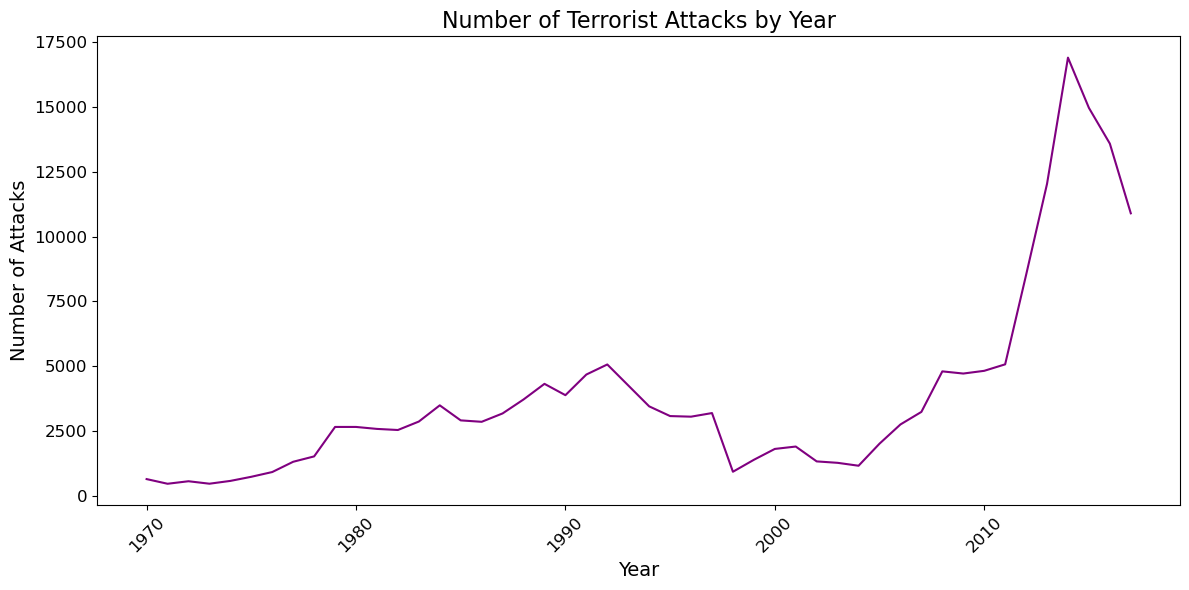

In [206]:
# Number of terrorist attacks by year
plt.figure(figsize=(12, 6))
df_year = df.groupby('Year')['EventID'].count()
df_year.plot(kind='line', color='purple')
plt.title('Number of Terrorist Attacks by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

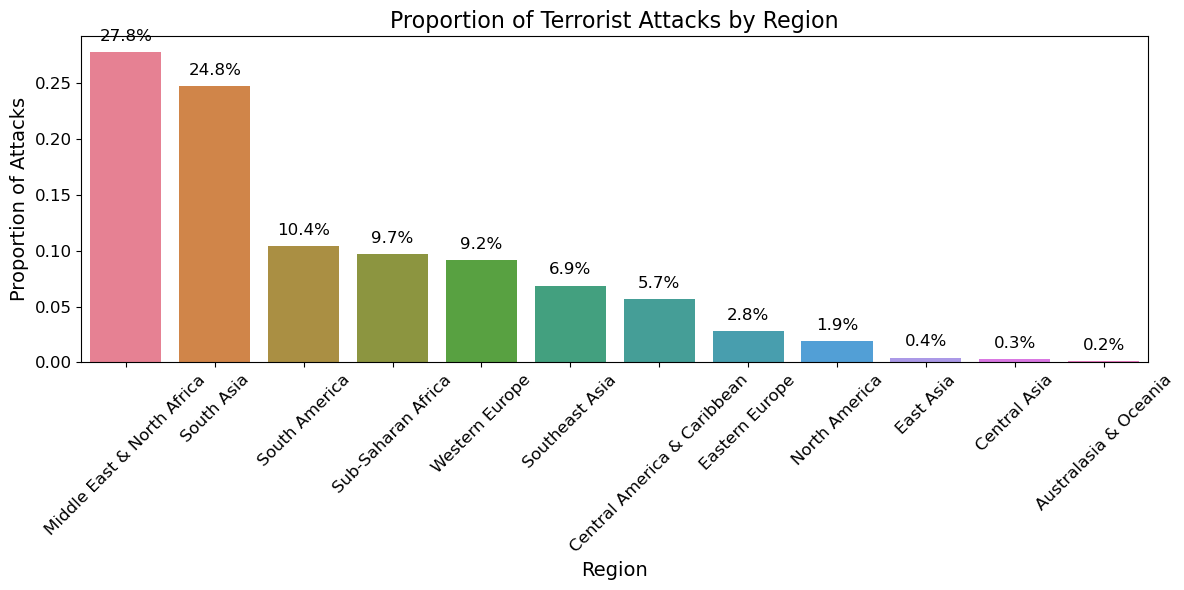

In [207]:
# Proportion of terrorist attacks by region
plt.figure(figsize=(12, 6))
df_region = df.groupby('Region')['EventID'].count().reset_index()
df_region = df_region.rename(columns={'EventID': 'Count'})
df_region = df_region.sort_values(by='Count', ascending=False)
df_region['Proportion'] = df_region['Count'] / df_region['Count'].sum()

# Set the color palette
palette = sns.color_palette("husl", len(df_region))

# Create the barplot with annotations
ax = sns.barplot(x='Region', y='Proportion', data=df_region, palette=palette)
plt.title('Proportion of Terrorist Attacks by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Proportion of Attacks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

for i, v in enumerate(df_region['Proportion']):
    ax.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=12, color='black')

plt.show()

According to the proportion of terrorist attacks by region, the Middle East & North Africa region has experienced the highest number of terrorist attacks, accounting for 28% of all attacks worldwide. South Asia is the second most affected region, with 25% of the attacks. South America and Sub-Saharan Africa follow with 10% and 9% of the attacks respectively.

The data suggests that terrorist attacks are concentrated in certain regions of the world, with the Middle East & North Africa and South Asia being the most affected. This could be due to factors such as political instability, social unrest, and religious extremism in these regions.

Understanding the patterns and trends of terrorism in different regions of the world can help security and defense analysts identify potential hotspots and develop strategies to prevent future attacks.

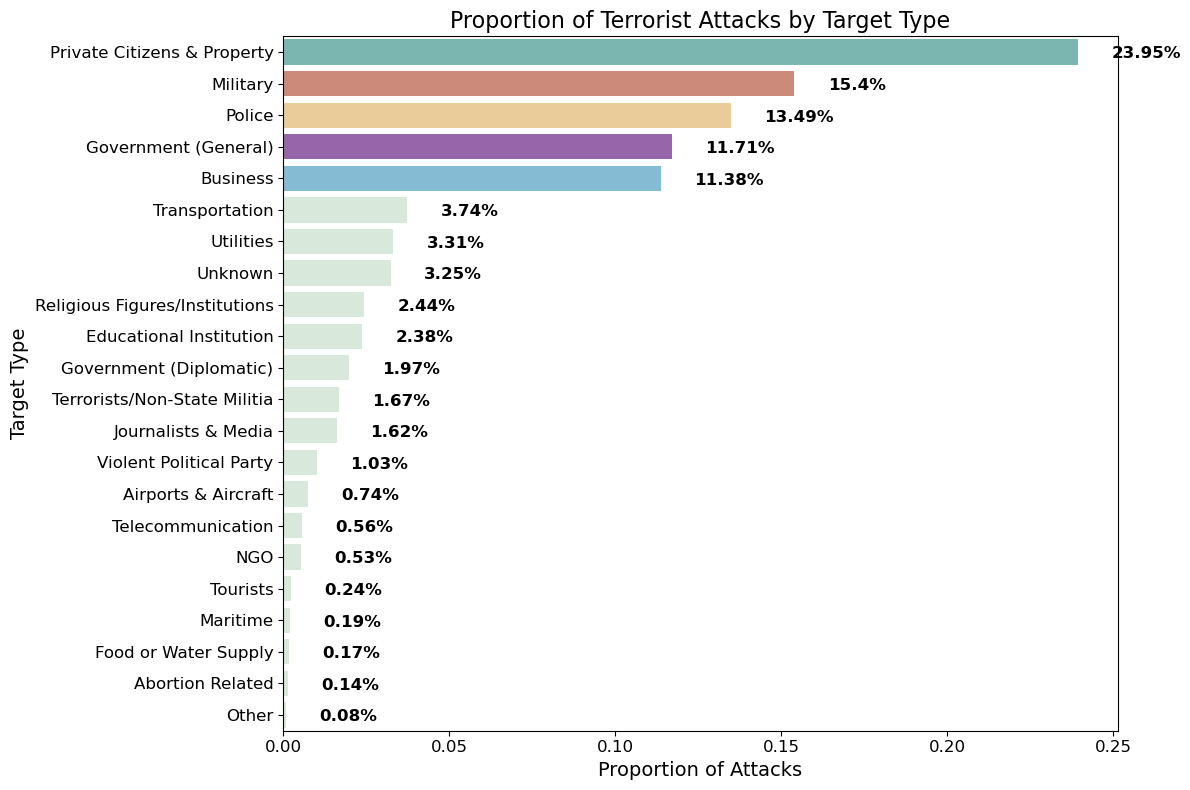

In [209]:
# Proportion of terrorist attacks by target type
plt.figure(figsize=(12, 8))
df_target = df.groupby('TargetType')['EventID'].count().reset_index()
df_target = df_target.rename(columns={'EventID': 'Count'})
df_target = df_target.sort_values(by='Count', ascending=False)
df_target['Proportion'] = df_target['Count'] / df_target['Count'].sum()

# Define a color palette
colors = ['#d6ead9'] * len(df_target)
colors[:5] = ['#73bfb8', '#d9826c', '#f7cf8d', '#9b59b6', '#78c0e0'] # Highlight the top 5 target types

ax = sns.barplot(x='Proportion', y='TargetType', data=df_target, palette=colors)

plt.title('Proportion of Terrorist Attacks by Target Type', fontsize=16)
plt.xlabel('Proportion of Attacks', fontsize=14)
plt.ylabel('Target Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels on top of each bar
for i, v in enumerate(df_target['Proportion']):
    ax.text(v + 0.01, i + .2, str(round(v * 100, 2)) + '%', fontweight='bold', fontsize=12, color='black')

plt.tight_layout()
plt.show()

According to the proportion of terrorist attacks by target type, private citizens and property are the most frequently targeted types, accounting for 24% of all attacks worldwide. Military targets and police are the second and third most frequently targeted types, with 15% and 13% of the attacks respectively.

The data suggests that terrorist attacks are aimed at a wide range of targets, including civilians, government officials, businesses, and religious figures, among others. This highlights the need for a multifaceted approach to counter-terrorism that includes a variety of strategies to protect different types of targets.

Understanding the patterns and trends of terrorism by target type can help security and defense analysts identify potential vulnerabilities and develop strategies to prevent future attacks. It can also provide insight into the motivations behind different types of attacks and help to identify emerging threats.

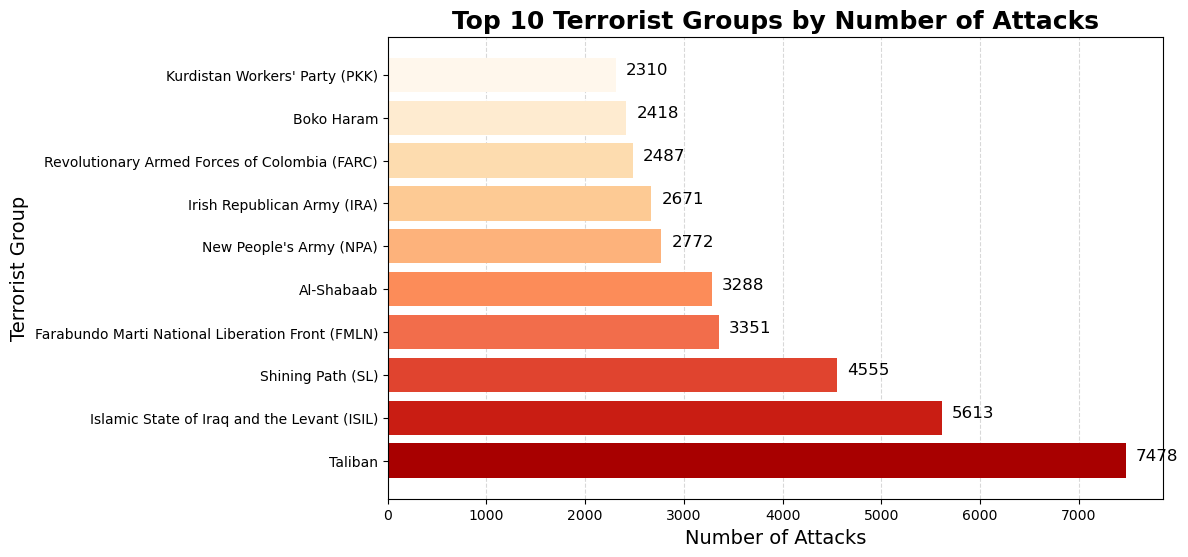

In [224]:
# Count the number of attacks by each terrorist group
group_counts = df.groupby('Group')['AttackType'].count().sort_values(ascending=False).drop('Unknown')

# Select the top N terrorist groups
n_groups = 10
top_groups = group_counts.head(n_groups)

# Define decreasing color map
n_colors = len(top_groups)
colors = [plt.cm.OrRd(i/n_colors) for i in range(n_colors)]

# Create a horizontal bar chart of the top N terrorist groups
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_groups.index, top_groups.values, color=colors[::-1])

# Add labels and title
ax.set_xlabel('Number of Attacks', fontsize=14)
ax.set_ylabel('Terrorist Group', fontsize=14)
ax.set_title(f'Top {n_groups} Terrorist Groups by Number of Attacks', fontsize=18, fontweight='bold')

# Add gridlines
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.3)
ax.set_axisbelow(True)

# Add value labels to the bars
for i, v in enumerate(top_groups.values):
    ax.text(v + 100, i, str(v), color='black', fontsize=12)

plt.show()

The data shows the top 10 terrorist groups with the highest number of attacks between 1970 and 2017. The Taliban tops the list with 7478 attacks, followed by Islamic State of Iraq and the Levant (ISIL) with 5613 attacks. Shining Path (SL) and Farabundo Marti National Liberation Front (FMLN) rank third and fourth with 4555 and 3351 attacks respectively. Al-Shabaab, New People's Army (NPA), Irish Republican Army (IRA), Revolutionary Armed Forces of Colombia (FARC), Boko Haram, and Kurdistan Workers' Party (PKK) complete the list.

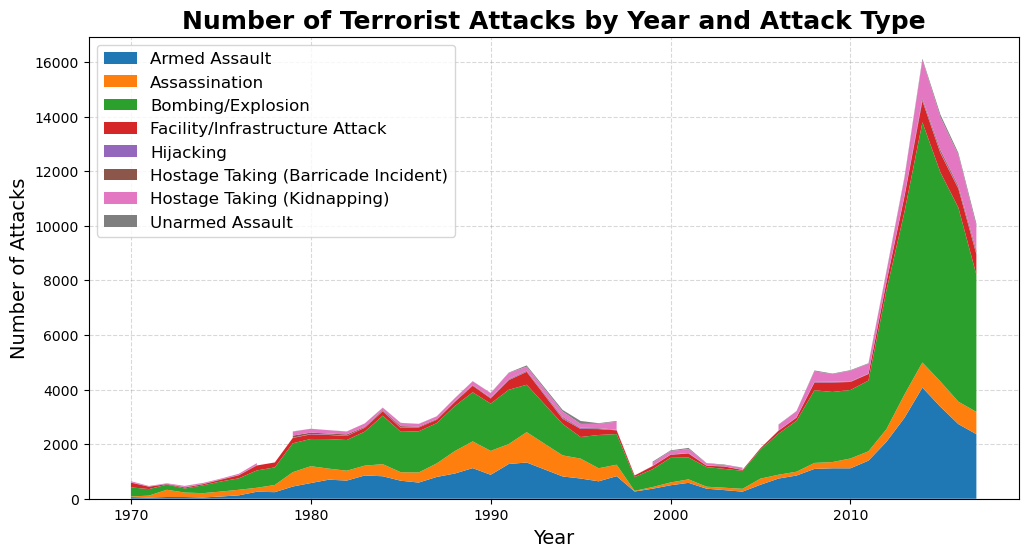

In [216]:
# Count the number of attacks by year and attack type (excluding Unknown)
attacks_by_year_type = df[df['AttackType'] != 'Unknown'].groupby(['Year', 'AttackType'])['AttackType'].count().unstack()


# Define color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a stacked area chart to show the number of terrorist attacks by year and attack type
fig, ax = plt.subplots(figsize=(12,6))
ax.stackplot(attacks_by_year_type.index, attacks_by_year_type.values.T, labels=attacks_by_year_type.columns, colors=colors)

# Add labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Attacks', fontsize=14)
ax.set_title('Number of Terrorist Attacks by Year and Attack Type', fontsize=18, fontweight='bold')

# Add legend and format it
legend = ax.legend(loc='upper left', fontsize=12)
for handle in legend.legendHandles:
    handle.set_linewidth(0)

# Add gridlines
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.3)
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.3)
ax.set_axisbelow(True)

plt.show()


The provided data shows the number of terrorist attacks by attack type and year from 1970 to 2017. The most common attack type is bombing/explosion, which has consistently been the most frequent type of attack over time. Armed assault and assassination are also common attack types. There was a sharp increase in the number of attacks after 2000, with 2014 having the highest number of attacks on record. The data also shows that the number of hijackings and hostage-taking incidents has decreased over time. This information can be used to inform security measures and prevention strategies to help mitigate the risk of future terrorist attacks.

<Figure size 1200x800 with 0 Axes>

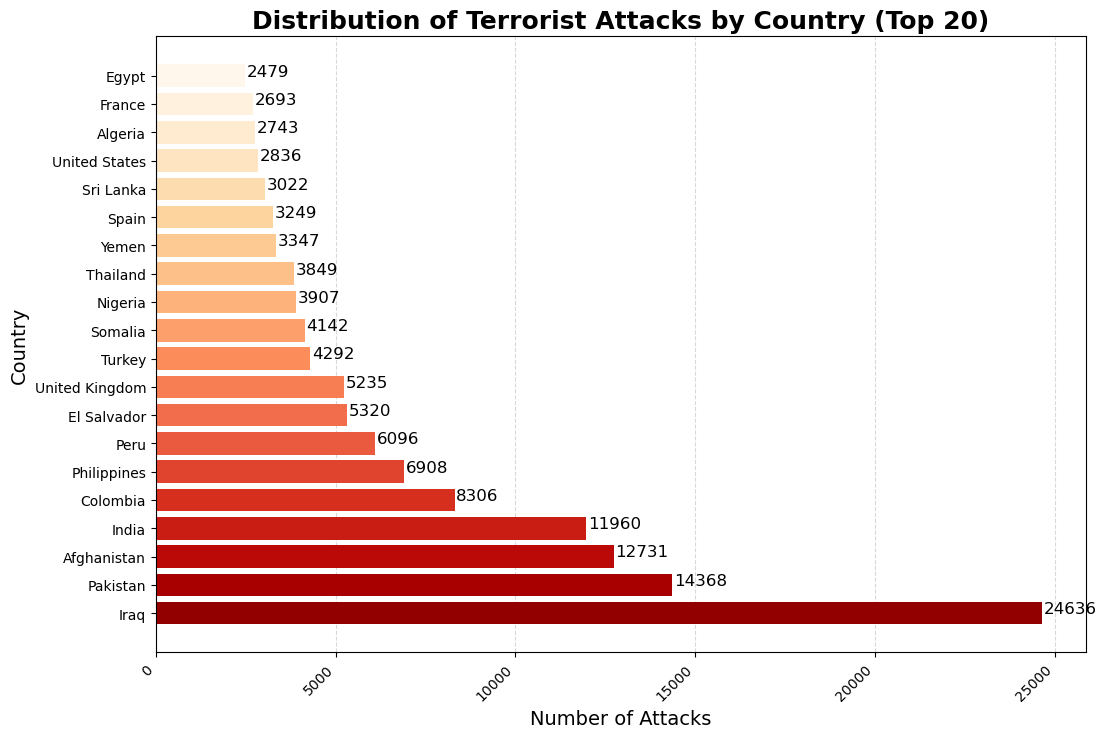

In [225]:
# Distribution of terrorist attacks by country
plt.figure(figsize=(12, 8))

# Group the data by country and count the number of attacks
df_country = df.groupby('Country')['EventID'].count().reset_index()

# Rename the column and sort the data in descending order
df_country = df_country.rename(columns={'EventID': 'Count'})
df_country = df_country.sort_values(by='Count', ascending=False).head(20)

# Define decreasing color map
n_colors = len(df_country)
colors = [plt.cm.OrRd(i/n_colors) for i in range(n_colors)]

# Create a horizontal bar chart to show the distribution of terrorist attacks by country
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(df_country['Country'], df_country['Count'], color=colors[::-1])

# Add labels and title
ax.set_xlabel('Number of Attacks', fontsize=14)
ax.set_ylabel('Country', fontsize=14)
ax.set_title('Distribution of Terrorist Attacks by Country (Top 20)', fontsize=18, fontweight='bold')

# Add value labels to the bars
for i, v in enumerate(df_country['Count']):
    ax.text(v + 50, i, str(v), color='black', fontsize=12)

# Add gridlines
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.3)
ax.set_axisbelow(True)

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right')
plt.show()

The above table shows the top 20 countries with the highest number of terrorist attacks between 1970 and 2017. Iraq tops the list with 24,636 terrorist attacks, followed by Pakistan with 14,368 attacks, and Afghanistan with 12,731 attacks.

The data suggests that the Middle East and South Asia have experienced the highest number of terrorist attacks, with Iraq and Pakistan being the two countries with the highest number of attacks. This highlights the importance of understanding the regional dynamics of terrorism and the need for targeted strategies to address the issue.

Understanding the distribution of terrorist attacks by country can help to inform security and defense strategies, as well as policies related to international cooperation and counter-terrorism efforts. It can also provide insight into the root causes of terrorism in different regions and help to identify emerging threats.

In [229]:
# Group the number of attacks by country
attacks_by_country = df.groupby('Country')['Country'].count().reset_index(name='Count')

# Load the map data for the countries
world_map = px.data.gapminder().query("year==2007")[['country', 'iso_alpha']]

# Rename the columns to match the DataFrame
world_map = world_map.rename(columns={'country': 'name'})

# Merge the attack data with the map data
merged_data = pd.merge(world_map, attacks_by_country, left_on='name', right_on='Country', how='left')

# Create a choropleth map with plotly
fig = px.choropleth(merged_data, locations='iso_alpha', color='Count',
                    hover_name='name', title='Number of Terrorist Attacks by Country',
                    projection='natural earth', color_continuous_scale='reds')

# Customize the map layout
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

fig.show()

<AxesSubplot:ylabel='AttackType'>

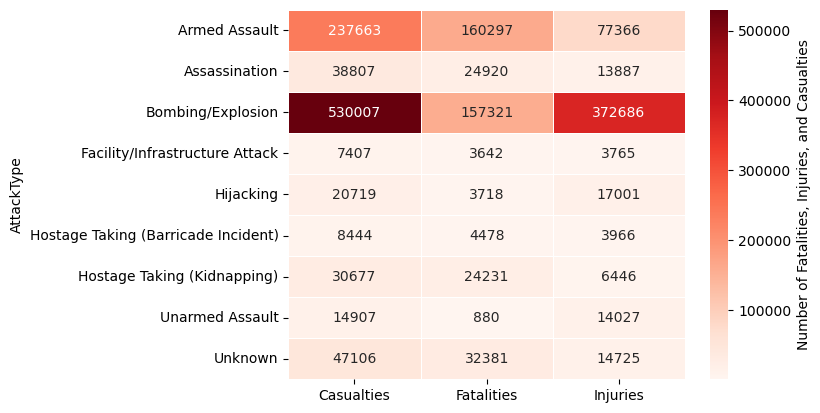

In [223]:
# Group the data by attack type and sum the number of fatalities, injuries, and casualties
attack_data = df.groupby('AttackType')[['Fatalities', 'Injuries', 'Casualties']].sum().reset_index()

# Pivot the data to create a heatmap of the number of fatalities, injuries, and casualties by attack type
attack_heatmap = pd.pivot_table(attack_data, values=['Fatalities', 'Injuries', 'Casualties'], index='AttackType')

# Create a heatmap for the number of fatalities, injuries, and casualties by attack type
sns.heatmap(attack_heatmap, cmap='Reds', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Number of Fatalities, Injuries, and Casualties'})

This table shows the total number of casualties, fatalities, and injuries by attack type. Bombing/explosion has the highest number of casualties and injuries, followed by armed assault. Assassination has the lowest number of casualties and injuries. The majority of the casualties and fatalities occurred in bombing/explosion and armed assault attacks.

<span style="text-decoration: underline;"><b><span style="font-size: 20px;">Summary:</span></b></span>

The Global Terrorism Dataset provides a comprehensive view of terrorist attacks worldwide from 1970 to 2017. By analyzing the data, we can draw several conclusions about the patterns and trends of terrorism:

1. The number of terrorist attacks increased sharply after 2000, with 2014 having the highest number of attacks on record. Analyzing the reasons for this trend and identifying emerging threats can help to develop proactive strategies to prevent future attacks. 
2. The Middle East & North Africa and South Asia regions have experienced the highest number of terrorist attacks, accounting for 28% and 25% of all attacks worldwide, respectively. 
3. Private citizens and property are the most frequently targeted types, accounting for 24% of all attacks. 
4. The Taliban is the terrorist group with the highest number of attacks, followed by ISIL. Bombing/explosion is the most common attack type, with armed assault and assassination also being common.

Additionally, the data suggests that terrorist attacks are concentrated in certain regions of the world and aimed at a wide range of targets. Understanding the patterns and trends of terrorism by region and target type can help security and defense analysts identify potential hotspots, vulnerabilities, and emerging threats. A multifaceted approach to counter-terrorism that includes a variety of strategies to protect different types of targets is needed.

<span style="text-decoration: underline;"><b><span style="font-size: 20px;">Conclusion:</span></b></span>

The Global Terrorism Dataset provides valuable insights into the nature of terrorism worldwide. It highlights the need for international cooperation and targeted strategies to address the issue. The concentration of terrorist attacks in certain regions and the variety of targets and attack types underscore the complexity of the problem. Preventing future attacks requires a multifaceted approach that includes not only security measures but also addressing the underlying root causes of terrorism such as political instability, social unrest, and religious extremism.

<span style="text-decoration: underline;"><b><span style="font-size: 20px;">Recommendation:</span></b></span>

Based on the analysis of the Global Terrorism Dataset, we recommend the following actions to prevent future terrorist attacks:

1. Strengthen international cooperation and collaboration in sharing intelligence and resources to identify and disrupt terrorist activities.
2. Develop targeted strategies to address the root causes of terrorism such as political instability, social unrest, and religious extremism.
3. Adopt a multifaceted approach to counter-terrorism that includes a variety of strategies to protect different types of targets.
4. Enhance security measures at potential hotspots and vulnerable locations, such as public transportation, government buildings, and critical infrastructure.
5. Invest in education and public awareness campaigns to promote tolerance and understanding among different cultures and religions.